In [69]:
!wget -O Predictioneer_Dataset.xlsx https://raw.githubusercontent.com/samkitpalrecha/predictioneer_dataset/main/Predictioneer_Dataset.xlsx

--2024-01-25 17:37:39--  https://raw.githubusercontent.com/samkitpalrecha/predictioneer_dataset/main/Predictioneer_Dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328974 (321K) [application/octet-stream]
Saving to: ‘Predictioneer_Dataset.xlsx’

Predictioneer_Datas 100%[===================>] 321.26K  --.-KB/s    in 0.04s   

2024-01-25 17:37:39 (8.84 MB/s) - ‘Predictioneer_Dataset.xlsx’ saved [328974/328974]



In [70]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

In [71]:
df = pd.read_excel('/content/Predictioneer_Dataset.xlsx')
df

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.00,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.00,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,2010-06-24,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,15.50,20.40,21.65,-10856.66667,-16511.040,-14208.480,0.0,0.0,0.39,NaN
4495,2010-06-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.50,20.70,21.95,-10856.66667,-16511.040,-14208.480,0.0,0.0,0.37,NaN
4496,2010-06-26,19.2,0.0,0.0,0.0,4.0,0.0,0.6,0.0,0.4,...,18.10,21.80,22.70,-10856.66667,-16511.040,-14208.480,0.0,0.0,0.31,NaN
4497,2010-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.2,2.6,...,19.45,22.85,23.35,-10313.83333,-15685.488,-13498.056,0.0,0.0,0.30,NaN


In [72]:
df = df.drop(df.index[0:2859])
df = df.reset_index(drop=True)
df

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,2006-01-01,37.2,26.0,21.4,43.2,29.4,35.2,31.2,0.0,11.2,...,0.00,5.10,5.80,-10355.06129,-17331.98265,-12716.70735,0.0,0.0,0.50,0.57
1,2006-01-02,3.2,8.4,0.2,8.0,6.0,7.4,3.6,0.0,0.0,...,0.00,5.55,5.30,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.53,0.72
2,2006-01-03,0.2,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2,...,0.00,6.25,6.15,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.48,0.47
3,2006-01-04,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.00,3.80,3.80,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.43,0.21
4,2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,4.35,4.20,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.38,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2010-06-24,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,15.50,20.40,21.65,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.39,NaN
1636,2010-06-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.50,20.70,21.95,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.37,NaN
1637,2010-06-26,19.2,0.0,0.0,0.0,4.0,0.0,0.6,0.0,0.4,...,18.10,21.80,22.70,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.31,NaN
1638,2010-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.2,2.6,...,19.45,22.85,23.35,-10313.83333,-15685.48800,-13498.05600,0.0,0.0,0.30,NaN


In [73]:
features = df.drop('Date', axis=1)
features = features.drop('Depth_to_Groundwater_DIEC', axis=1)
x = features.values

# Create a iterative imputer
imputer = IterativeImputer(max_iter = 10000)

# Perform imputation
X_imputed = imputer.fit_transform(x)
df_imputed = pd.DataFrame(X_imputed, columns=features.columns)
df_imputed

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,37.2,26.0,21.4,43.2,29.4,35.2,31.2,0.0,11.2,38.0,...,0.00,5.10,5.80,-10355.06129,-17331.98265,-12716.70735,0.0,0.0,0.50,0.570000
1,3.2,8.4,0.2,8.0,6.0,7.4,3.6,0.0,0.0,4.2,...,0.00,5.55,5.30,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.53,0.720000
2,0.2,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2,0.2,...,0.00,6.25,6.15,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.48,0.470000
3,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.00,3.80,3.80,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.43,0.210000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,4.35,4.20,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.38,0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,15.50,20.40,21.65,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.39,0.462706
1636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.50,20.70,21.95,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.37,0.457924
1637,19.2,0.0,0.0,0.0,4.0,0.0,0.6,0.0,0.4,10.8,...,18.10,21.80,22.70,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.31,0.484636
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.2,2.6,0.0,...,19.45,22.85,23.35,-10313.83333,-15685.48800,-13498.05600,0.0,0.0,0.30,0.354294


In [74]:
from datetime import datetime
df_imputed['Date'] = df['Date']
df_imputed['Date'] = pd.to_datetime(df_imputed['Date'], infer_datetime_format = True)
df_imputed = df_imputed.set_index(['Date'])
df_imputed

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-01,37.2,26.0,21.4,43.2,29.4,35.2,31.2,0.0,11.2,38.0,...,0.00,5.10,5.80,-10355.06129,-17331.98265,-12716.70735,0.0,0.0,0.50,0.570000
2006-01-02,3.2,8.4,0.2,8.0,6.0,7.4,3.6,0.0,0.0,4.2,...,0.00,5.55,5.30,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.53,0.720000
2006-01-03,0.2,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2,0.2,...,0.00,6.25,6.15,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.48,0.470000
2006-01-04,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.00,3.80,3.80,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.43,0.210000
2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,4.35,4.20,-10900.06452,-18244.19226,-13386.00774,0.0,0.0,0.38,0.180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-24,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,...,15.50,20.40,21.65,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.39,0.462706
2010-06-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.50,20.70,21.95,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.37,0.457924
2010-06-26,19.2,0.0,0.0,0.0,4.0,0.0,0.6,0.0,0.4,10.8,...,18.10,21.80,22.70,-10856.66667,-16511.04000,-14208.48000,0.0,0.0,0.31,0.484636


In [75]:
if df_imputed.isna().any().any():
    print("nan is present")

In [76]:
#dropping these 2 columns as they have constant values throughout the dataset
df_imputed = df_imputed.drop('Volume_CSA', axis=1)
df_imputed = df_imputed.drop('Volume_CSAL', axis=1)

from statsmodels.tsa.stattools import adfuller

columns = df_imputed.columns
p_values = []

for column in columns:
   def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     p_values.append(dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

for column in columns:
    if df_imputed[column].nunique() > 1:  # Check if the column has more than one unique value
        print(f"Performing ADF test for column: {column}")
        ad_test(df_imputed[column])
    else:
        print(f"Skipping ADF test for column {column} because it has constant values.")

Performing ADF test for column: Rainfall_Gallicano
1. ADF :  -15.61715659187499
2. P-Value :  1.7502222246925863e-28
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 1636
5. Critical Values :
	 1% :  -3.4343534169127015
	 5% :  -2.8633082781047787
	 10% :  -2.5677113918048073
Performing ADF test for column: Rainfall_Pontetetto
1. ADF :  -19.191926590696742
2. P-Value :  0.0
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 1637
5. Critical Values :
	 1% :  -3.434350967480226
	 5% :  -2.8633071969335333
	 10% :  -2.56771081609273
Performing ADF test for column: Rainfall_Monte_Serra
1. ADF :  -16.226106418115545
2. P-Value :  3.8536265298193087e-29
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 1636
5. Critical Values :
	 1% :  -3.4343534169127015
	 5% :  -2.8633082781047787
	 10% :  -2.5677113918048073
Performing ADF test for column: Rainfall_Orentano
1. ADF :  -16.346706585236983
2. P-Value :  2.9595824120863977e-29
3. Num Of La

In [77]:
p_values

[1.7502222246925863e-28,
 0.0,
 3.8536265298193087e-29,
 2.9595824120863977e-29,
 4.484129320337115e-29,
 2.497145377545527e-30,
 5.674819060993175e-29,
 0.0,
 8.663476524990902e-29,
 6.765490131781609e-29,
 0.7649200681131827,
 0.04216593997644171,
 0.11425846066958467,
 0.11031604791182353,
 0.10217683292760055,
 0.005001245440442373,
 0.03964522206961409,
 0.09833430575538166,
 0.0625164242355966,
 0.0006748425707982761,
 0.010938989091544553,
 0.0009521960461171219,
 1.2828492109905115e-07]

In [78]:
df_imputed.columns

Index(['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
       'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Temperature_Orentano',
       'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano',
       'Temperature_Lucca_Orto_Botanico', 'Volume_POL', 'Volume_CC1',
       'Volume_CC2', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

## Exploratory Data Analysis

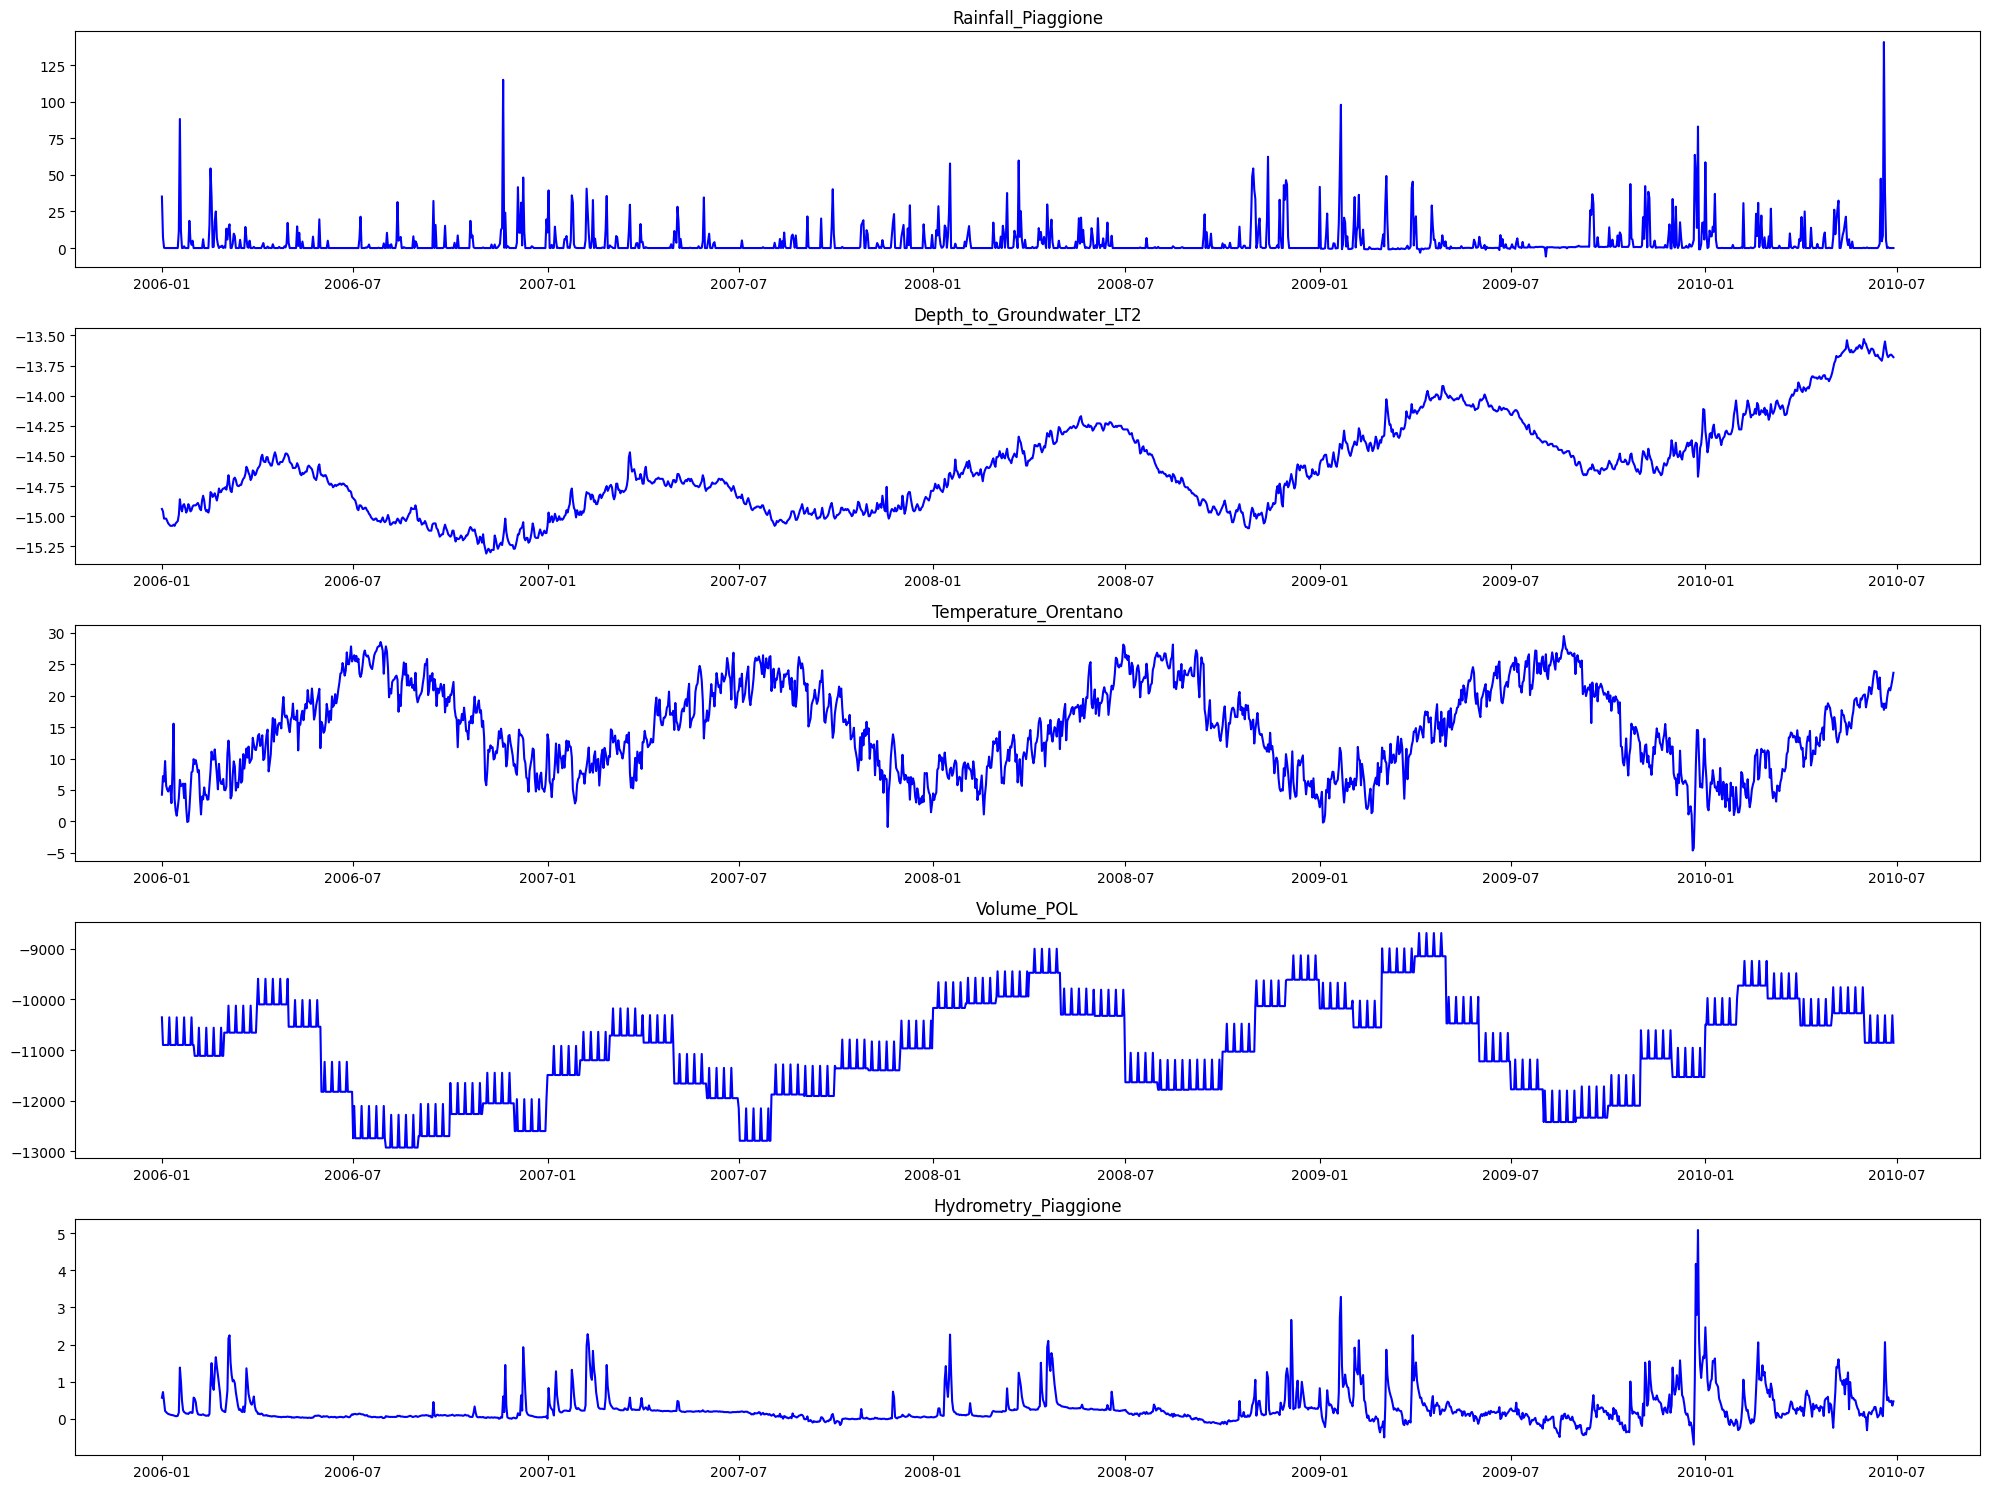

In [79]:
import matplotlib.pyplot as plt
# Get the list of feature names
eda_columns = ['Rainfall_Piaggione','Depth_to_Groundwater_LT2','Temperature_Orentano', 'Volume_POL', 'Hydrometry_Piaggione']

# Create subplots with 5 rows and 4 columns
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through each feature and plot against predicted values
for i, column in enumerate(eda_columns):
    ax = axes[i]
    ax.plot(df_imputed.index, df_imputed[column], color='blue')
    ax.set_title(f'{column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

from above graphs:

*   depth_to_groundwater: reaches its maximum around May/June and its minimum around september
*   volume: reaches its maxmium around july/augest and its minimum around feb/march

*   temperature: reaches its minimum around january of a year and reaches max around january of next year.(have a 2 year cycle)
*   river_hydrometry: reaches its maximum around March/april.



In [80]:
pip install prophet

In [84]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming df_imputed is your DataFrame containing the data

feature_columns = ['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
                   'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
                   'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
                   'Rainfall_Tereglio_Coreglia_Antelminelli',
                   'Rainfall_Fabbriche_di_Vallico', 'Temperature_Orentano',
                   'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano',
                   'Temperature_Lucca_Orto_Botanico', 'Volume_POL', 'Volume_CC1',
                   'Volume_CC2', 'Hydrometry_Monte_S_Quirico',
                   'Hydrometry_Piaggione']

target_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']

forecast = pd.DataFrame()
df_reset = df_imputed.reset_index()

for target_column in target_columns:
    multivariate_df = df_reset[['Date', target_column] + feature_columns].copy()
    multivariate_df.columns = ['ds', 'y'] + feature_columns

    train_size = int(0.85 * len(multivariate_df))
    train = multivariate_df.iloc[:train_size, :]
    valid = multivariate_df.iloc[train_size:, :]

    # Train the model
    model = Prophet()
    for column in feature_columns:
        model.add_regressor(column)

    # Fit the model with train set
    model.fit(train)

    # Predict on valid set
    forecast_valid = model.predict(valid.drop(columns='y'))

    # Calculate metrics
    score_mae = mean_absolute_error(valid['y'], forecast_valid['yhat'])
    score_rmse = sqrt(mean_squared_error(valid['y'], forecast_valid['yhat']))

    print(f'For {target_column}:')
    print('RMSE:', score_rmse)
    print('MAE:', score_mae)

# Print the forecast DataFrame
print(forecast.tail())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/ve7mpu9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/q8ollkrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25939', 'data', 'file=/tmp/tmpckpm5tsx/ve7mpu9s.json', 'init=/tmp/tmpckpm5tsx/q8ollkrd.json', 'output', 'file=/tmp/tmpckpm5tsx/prophet_modelqo5dtt1y/prophet_model-20240125174017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


For Depth_to_Groundwater_LT2:
RMSE: 0.10599020793704575
MAE: 0.08727346950547585


DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/78syspp3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/jxqn8357.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43484', 'data', 'file=/tmp/tmpckpm5tsx/78syspp3.json', 'init=/tmp/tmpckpm5tsx/jxqn8357.json', 'output', 'file=/tmp/tmpckpm5tsx/prophet_modelcmco5xp1/prophet_model-20240125174025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/k8peun6n.json


For Depth_to_Groundwater_SAL:
RMSE: 0.405449908766171
MAE: 0.3223685350679974


DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/5bcew4qn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82346', 'data', 'file=/tmp/tmpckpm5tsx/k8peun6n.json', 'init=/tmp/tmpckpm5tsx/5bcew4qn.json', 'output', 'file=/tmp/tmpckpm5tsx/prophet_modeluq204_3e/prophet_model-20240125174028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


For Depth_to_Groundwater_CoS:
RMSE: 0.459651403162141
MAE: 0.37991071408221405
Empty DataFrame
Columns: []
Index: []


In [95]:
df_reset = df_imputed.reset_index()

for target_column in target_columns:
    multivariate_df = df_reset[['Date', target_column] + feature_columns].copy()
    multivariate_df.columns = ['ds', 'y'] + feature_columns

    train_size = 1640
    train = multivariate_df.iloc[:train_size, :]

    # Train the model
    model = Prophet()
    for column in feature_columns:
        model.add_regressor(column)

    # Fit the model with train set
    model.fit(train)
    # Forecast for future dates
    future_dates = model.make_future_dataframe(periods=1095)
    for column in feature_columns:
        future_dates[column] = df_imputed[column]
        future_dates = future_dates.fillna(value=0)  # Fill NaN values with 0
    forecast_target = model.predict(future_dates)
    forecast[target_column] = forecast_target['yhat']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/3g8_l9lo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpckpm5tsx/u77tic5b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38646', 'data', 'file=/tmp/tmpckpm5tsx/3g8_l9lo.json', 'init=/tmp/tmpckpm5tsx/u77tic5b.json', 'output', 'file=/tmp/tmpckpm5tsx/prophet_model1uccwle1/prophet_model-20240125180850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:08:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:08:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpck

In [107]:
forecast = forecast.iloc[-1096:]
forecast.reset_index()
forecast.to_csv('forecast.csv')